test2
andrew y ernesto

In [187]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print("testing")

testing


In [188]:
dataset = pd.read_excel("Data_Train.xlsx")
#print(dataset.describe(include='all'))
print(dataset.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


In [189]:
# Función que convierte los datos no numéricos de
# la propiedad "Total_Stops" en numéricos.
# Entrada: stringDtype; Salida: integer
def uniform_stops(data):
    if type(data) == float: # De ser un dato vacío,
        data = 0 # Asigna una cantidad de 0 horas.
    elif type(data) != numpy.int64: # De ser el dato un string,
        # inicia el ciclo.
        if data == "non-stop": # Si "non-stop",
            data = 0 # Guarda el número de paradas como 0
        else: # Sino,
            data = int(data[0]) # Guarda el número de paradas que corresponde
            # al primer dígito del dato.
    return data
# Función que convierte los datos no numéricos de
# la propiedad "Duration" en numéricos.
# Entrada: stringDtype; Salida: integer
def uniform_duration(data):
    if data.find("m") == -1: # Dato con formato “#h”
        [horas] = data.split(" ") # Asigna a "horas"
        horas = horas.strip("h") # el número de horas
        minutos = 0 # y a "minutos" 0
    elif data.find("h") == -1: # Dato con formato “#m”
        [minutos] = data.split(" ") # Asigna a "minutos"
        minutos = minutos.strip("m") # el número de minutos
        horas = 0 # y a "horas" 0
    else:
        [horas, minutos] = data.split(" ") # Dato con formato “#h #m”
        minutos = minutos.strip("m") # Extrae las horas y minutos
        horas = horas.strip("h") # y los asigna a la variable apropiada
    # Se suma la cantidad de minutos totales que durará el vuelo
    data = int(horas)*60 + int(minutos)
    return data


In [190]:
# Procesamiento de datos
dataset["Duration"] = dataset["Duration"].apply(lambda x: uniform_duration(x))
dataset["Total_Stops"] = dataset["Total_Stops"].apply(lambda x: uniform_stops(x))
dataset = dataset[["Duration", "Total_Stops","Price"]]
# Normalizado
max_val = dataset.max(axis=0) # Se obtiene el máximo de cada columna
min_val = dataset.min(axis=0) # Se obtiene el mínimo de cada columna
range = max_val - min_val # Se obtiene la diferencia de los dos
dataset = (dataset - min_val)/(range) # Y se utiliza para normalizarlas
dataset = dataset.astype(float) # Se asegura que los datos sean tipo float
print(dataset)

       Duration  Total_Stops     Price
0      0.057793         0.00  0.027497
1      0.154116         0.50  0.075920
2      0.397548         0.50  0.155917
3      0.112084         0.25  0.057348
4      0.098074         0.25  0.148457
...         ...          ...       ...
10678  0.050788         0.00  0.030198
10679  0.052539         0.00  0.030687
10680  0.061296         0.00  0.070351
10681  0.054291         0.00  0.140046
10682  0.173380         0.50  0.128535

[10683 rows x 3 columns]


In [191]:
train_percentage=0.7
# Distribución de los datos
trainset = dataset.sample(frac=train_percentage) # Se extraen datos
# para el entrenamiento
testset = dataset.drop(trainset.index) # Y se le quitan esos mismos
# al dataset para crear los datos de prueba
print(trainset)
print(testset)

       Duration  Total_Stops     Price
7420   0.281961         0.25  0.061310
9409   0.049037         0.00  0.031060
5373   0.227671         0.50  0.100665
10251  0.196147         0.25  0.101437
3964   0.287215         0.25  0.064705
...         ...          ...       ...
5341   0.075306         0.25  0.065567
5364   0.288967         0.25  0.124124
10331  0.180385         0.25  0.128998
9503   0.057793         0.00  0.035034
9860   0.059545         0.00  0.070351

[7478 rows x 3 columns]
       Duration  Total_Stops     Price
0      0.057793         0.00  0.027497
1      0.154116         0.50  0.075920
4      0.098074         0.25  0.148457
8      0.534151         0.25  0.119970
13     0.253940         0.25  0.101655
...         ...          ...       ...
10670  0.364273         0.50  0.124137
10674  0.518389         0.25  0.119970
10676  0.180385         0.25  0.103340
10679  0.052539         0.00  0.030687
10682  0.173380         0.50  0.128535

[3205 rows x 3 columns]


In [192]:
network = tf.keras.models.Sequential()
# Declaración de la capa de entrada
network.add(tf.keras.layers.Dense(
units=5,
input_shape=(2,)))
# Ciclo de capas de neuronas intermedias
i = 0
while i < 2-1:
    network.add(tf.keras.layers.Dense(
    units=5,
    activation="sigmoid"))
    i += 1
    # Declaración de la capa de salida
    network.add(tf.keras.layers.Dense(
    units=1,
    activation="sigmoid"))

In [193]:
network.compile(
optimizer="adam",
loss="mse")

In [194]:
losses = network.fit(x=trainset[["Duration", "Total_Stops"]],
y=trainset['Price'],
validation_data=(
testset[["Duration", "Total_Stops"]],
testset['Price']),
batch_size=300,
epochs=40
)

Epoch 1/40
25/25 [==============================] - 1s 11ms/step - loss: 0.3779 - val_loss: 0.3593
Epoch 2/40
25/25 [==============================] - 0s 5ms/step - loss: 0.3457 - val_loss: 0.3271
Epoch 3/40
25/25 [==============================] - 0s 6ms/step - loss: 0.3134 - val_loss: 0.2949
Epoch 4/40
25/25 [==============================] - 0s 5ms/step - loss: 0.2811 - val_loss: 0.2627
Epoch 5/40
25/25 [==============================] - 0s 4ms/step - loss: 0.2491 - val_loss: 0.2311
Epoch 6/40
25/25 [==============================] - 0s 4ms/step - loss: 0.2177 - val_loss: 0.2004
Epoch 7/40
25/25 [==============================] - 0s 4ms/step - loss: 0.1877 - val_loss: 0.1716
Epoch 8/40
25/25 [==============================] - 0s 4ms/step - loss: 0.1600 - val_loss: 0.1454
Epoch 9/40
25/25 [==============================] - 0s 4ms/step - loss: 0.1353 - val_loss: 0.1225
Epoch 10/40
25/25 [==============================] - 0s 4ms/step - loss: 0.1140 - val_loss: 0.1032
Epoch 11/40
25/25 

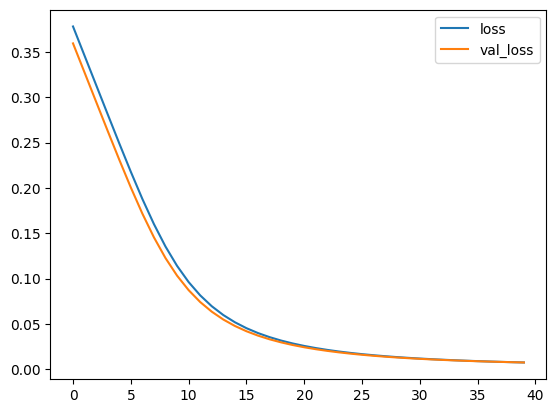

In [195]:
# Se extrae el historial de error contra iteraciones de la clase
loss_df = pd.DataFrame(losses.history)
# Se grafica
loss_df.loc[:, ['loss', 'val_loss']].plot()
# Y se pide que se muestre la ventana en que se graficó
plt.show()

In [196]:
# Se eligen 10 datos al azar
dato = dataset.sample(frac=10/dataset.shape[0])
datoPrueba = dato.drop(columns=["Price"])
# Y se predice el precio que tendría, luego de
# revertir la normalización
precio = network.predict(datoPrueba)
print("Dato ingresado:")
print(dato*range+ min_val) # Se normalizan los datos
dato["Price"] = precio
print("Estimación: ")
print(dato*range+ min_val)

1/1 [==============================] - 0s 75ms/step
Dato ingresado:
       Duration  Total_Stops    Price
1142     1025.0          2.0  13014.0
8086     1295.0          1.0  13401.0
3224      170.0          0.0   8033.0
10640    1475.0          1.0  14053.0
4214      135.0          0.0   3543.0
1247      350.0          1.0  15103.0
3846      175.0          0.0   6741.0
838      1210.0          1.0  15554.0
7521     1620.0          2.0  14508.0
2258      435.0          1.0  12284.0
Estimación: 
       Duration  Total_Stops         Price
1142     1025.0          2.0  12758.967181
8086     1295.0          1.0  12886.860345
3224      170.0          0.0  14268.348658
10640    1475.0          1.0  12831.495008
4214      135.0          0.0  14319.336766
1247      350.0          1.0  13344.916803
3846      175.0          0.0  14261.186131
838      1210.0          1.0  12915.782726
7521     1620.0          2.0  12648.547015
2258      435.0          1.0  13288.607199
